# COVID Vaccination scRNA-seq GEX data analysis





In [1]:
# loading libraries
library(dplyr)
library(Seurat)
library(ggplot2)
library(biomaRt)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



# Script merging all dataset

Did run on HPC. Just load data below.

# Loading data

In [4]:
# Loading the data
local.data.root <- file.path("~","Documents",  "Project", "data")

combined <- readRDS(paste(local.data.root,"combined_COVIDskin_scRNA.RData",sep = "/"))


#adding more metadata information to object: diseases, area and vaccine number
temp_meta= combined@meta.data #get metadata from object
temp_meta= temp_meta %>% tidyr::separate(sampleName, into = c("disease","area","vaccine"), sep = "_") #split into separate columns
temp_meta$disease = gsub('[[:digit:]]+', '', temp_meta$disease) # deleting numbers in disease type category
combined@meta.data = temp_meta #new metadate
rm(temp_meta)

# QC results

In [7]:
# Setting colours
library(viridis)
# to help distinguish between datasets during visualization (violin plots, umaps, etc.)
disease_colors <- c(viridis(3)) # BCD, HD, DC
area_colors <- c(inferno(2)) # vac, unv
vaccine_color <- c(plasma(2)) # 2nd or booster


# this is just for the QC
# there are 6 samples of each type
# vln_colors <- c(rep(disease_colors[1], nrow(filter(metadata, disease == "BCD"))),
#                 rep(disease_colors[2], nrow(filter(metadata, disease == "HD"))),
#                 rep(disease_colors[3], nrow(filter(metadata, disease == "DC"))))

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



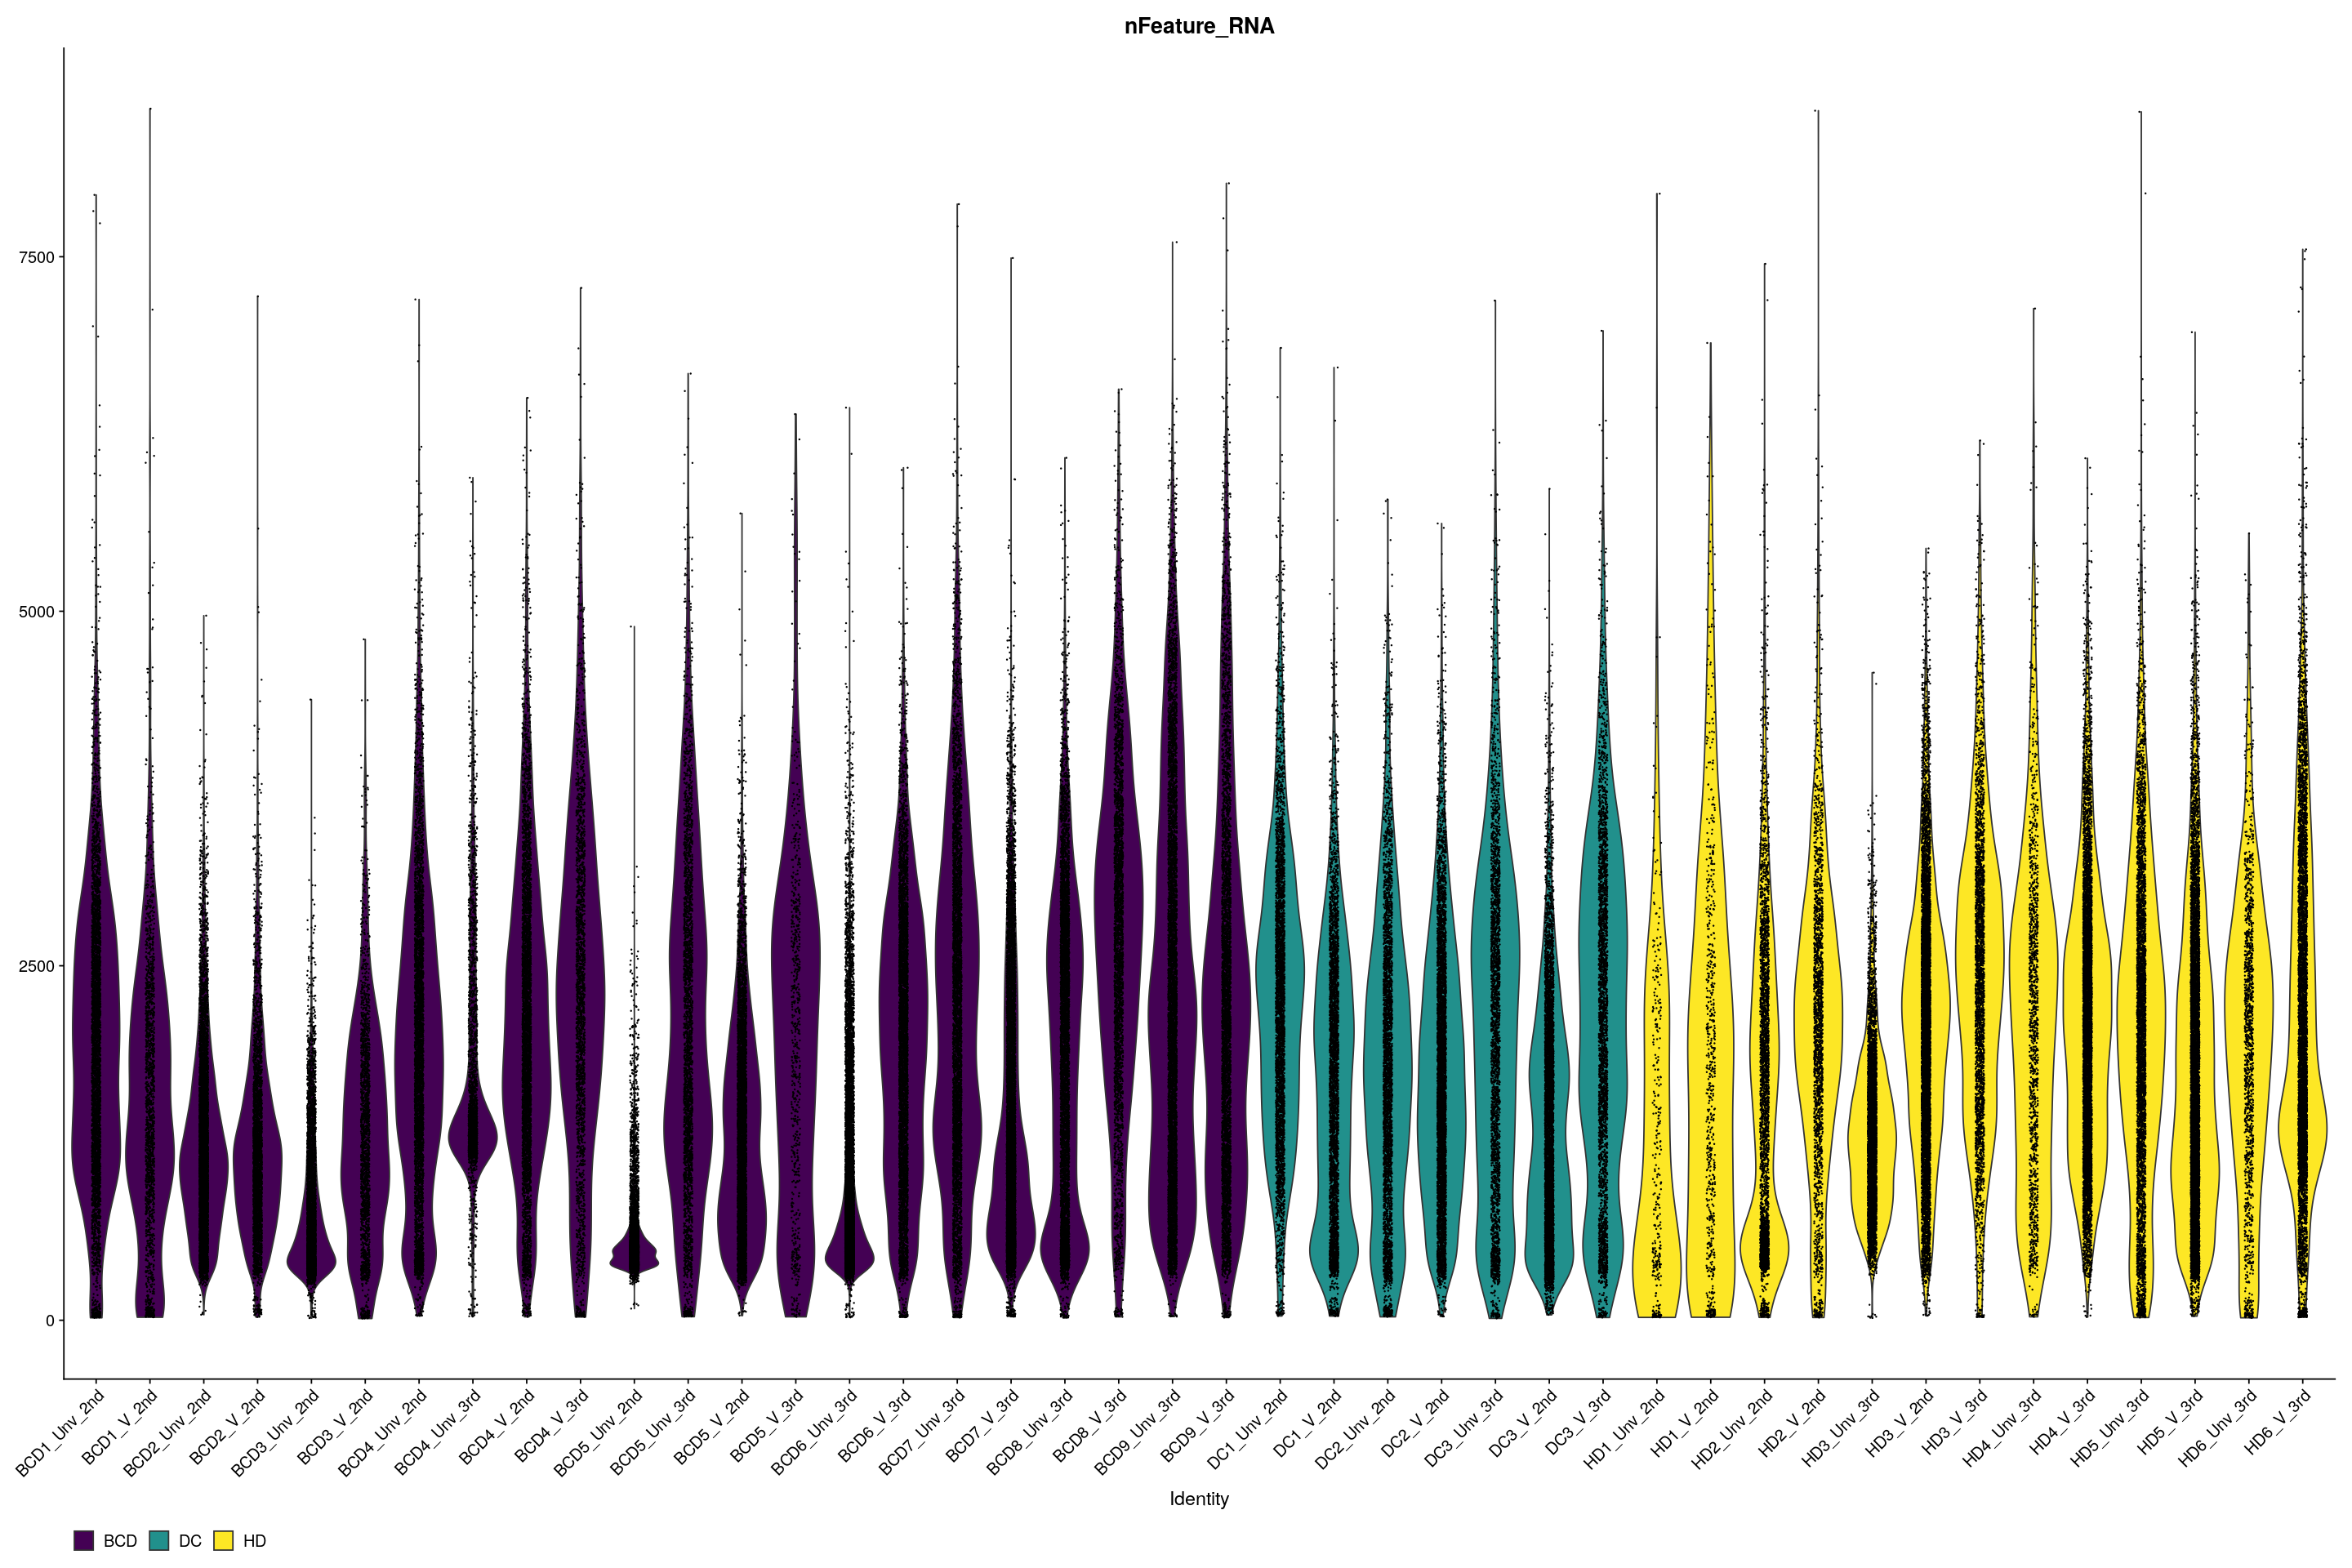

In [8]:
options(repr.plot.width=24, repr.plot.height=16)
#VlnPlot(object = combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(object = combined, features = "nFeature_RNA", split.by = "disease")+ ggplot2::theme(legend.position = 'bottom') + ggplot2::scale_fill_manual(values = disease_colors)


This lab normally doesn't use a maximum cutoff. Minimum around 200 seems good.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



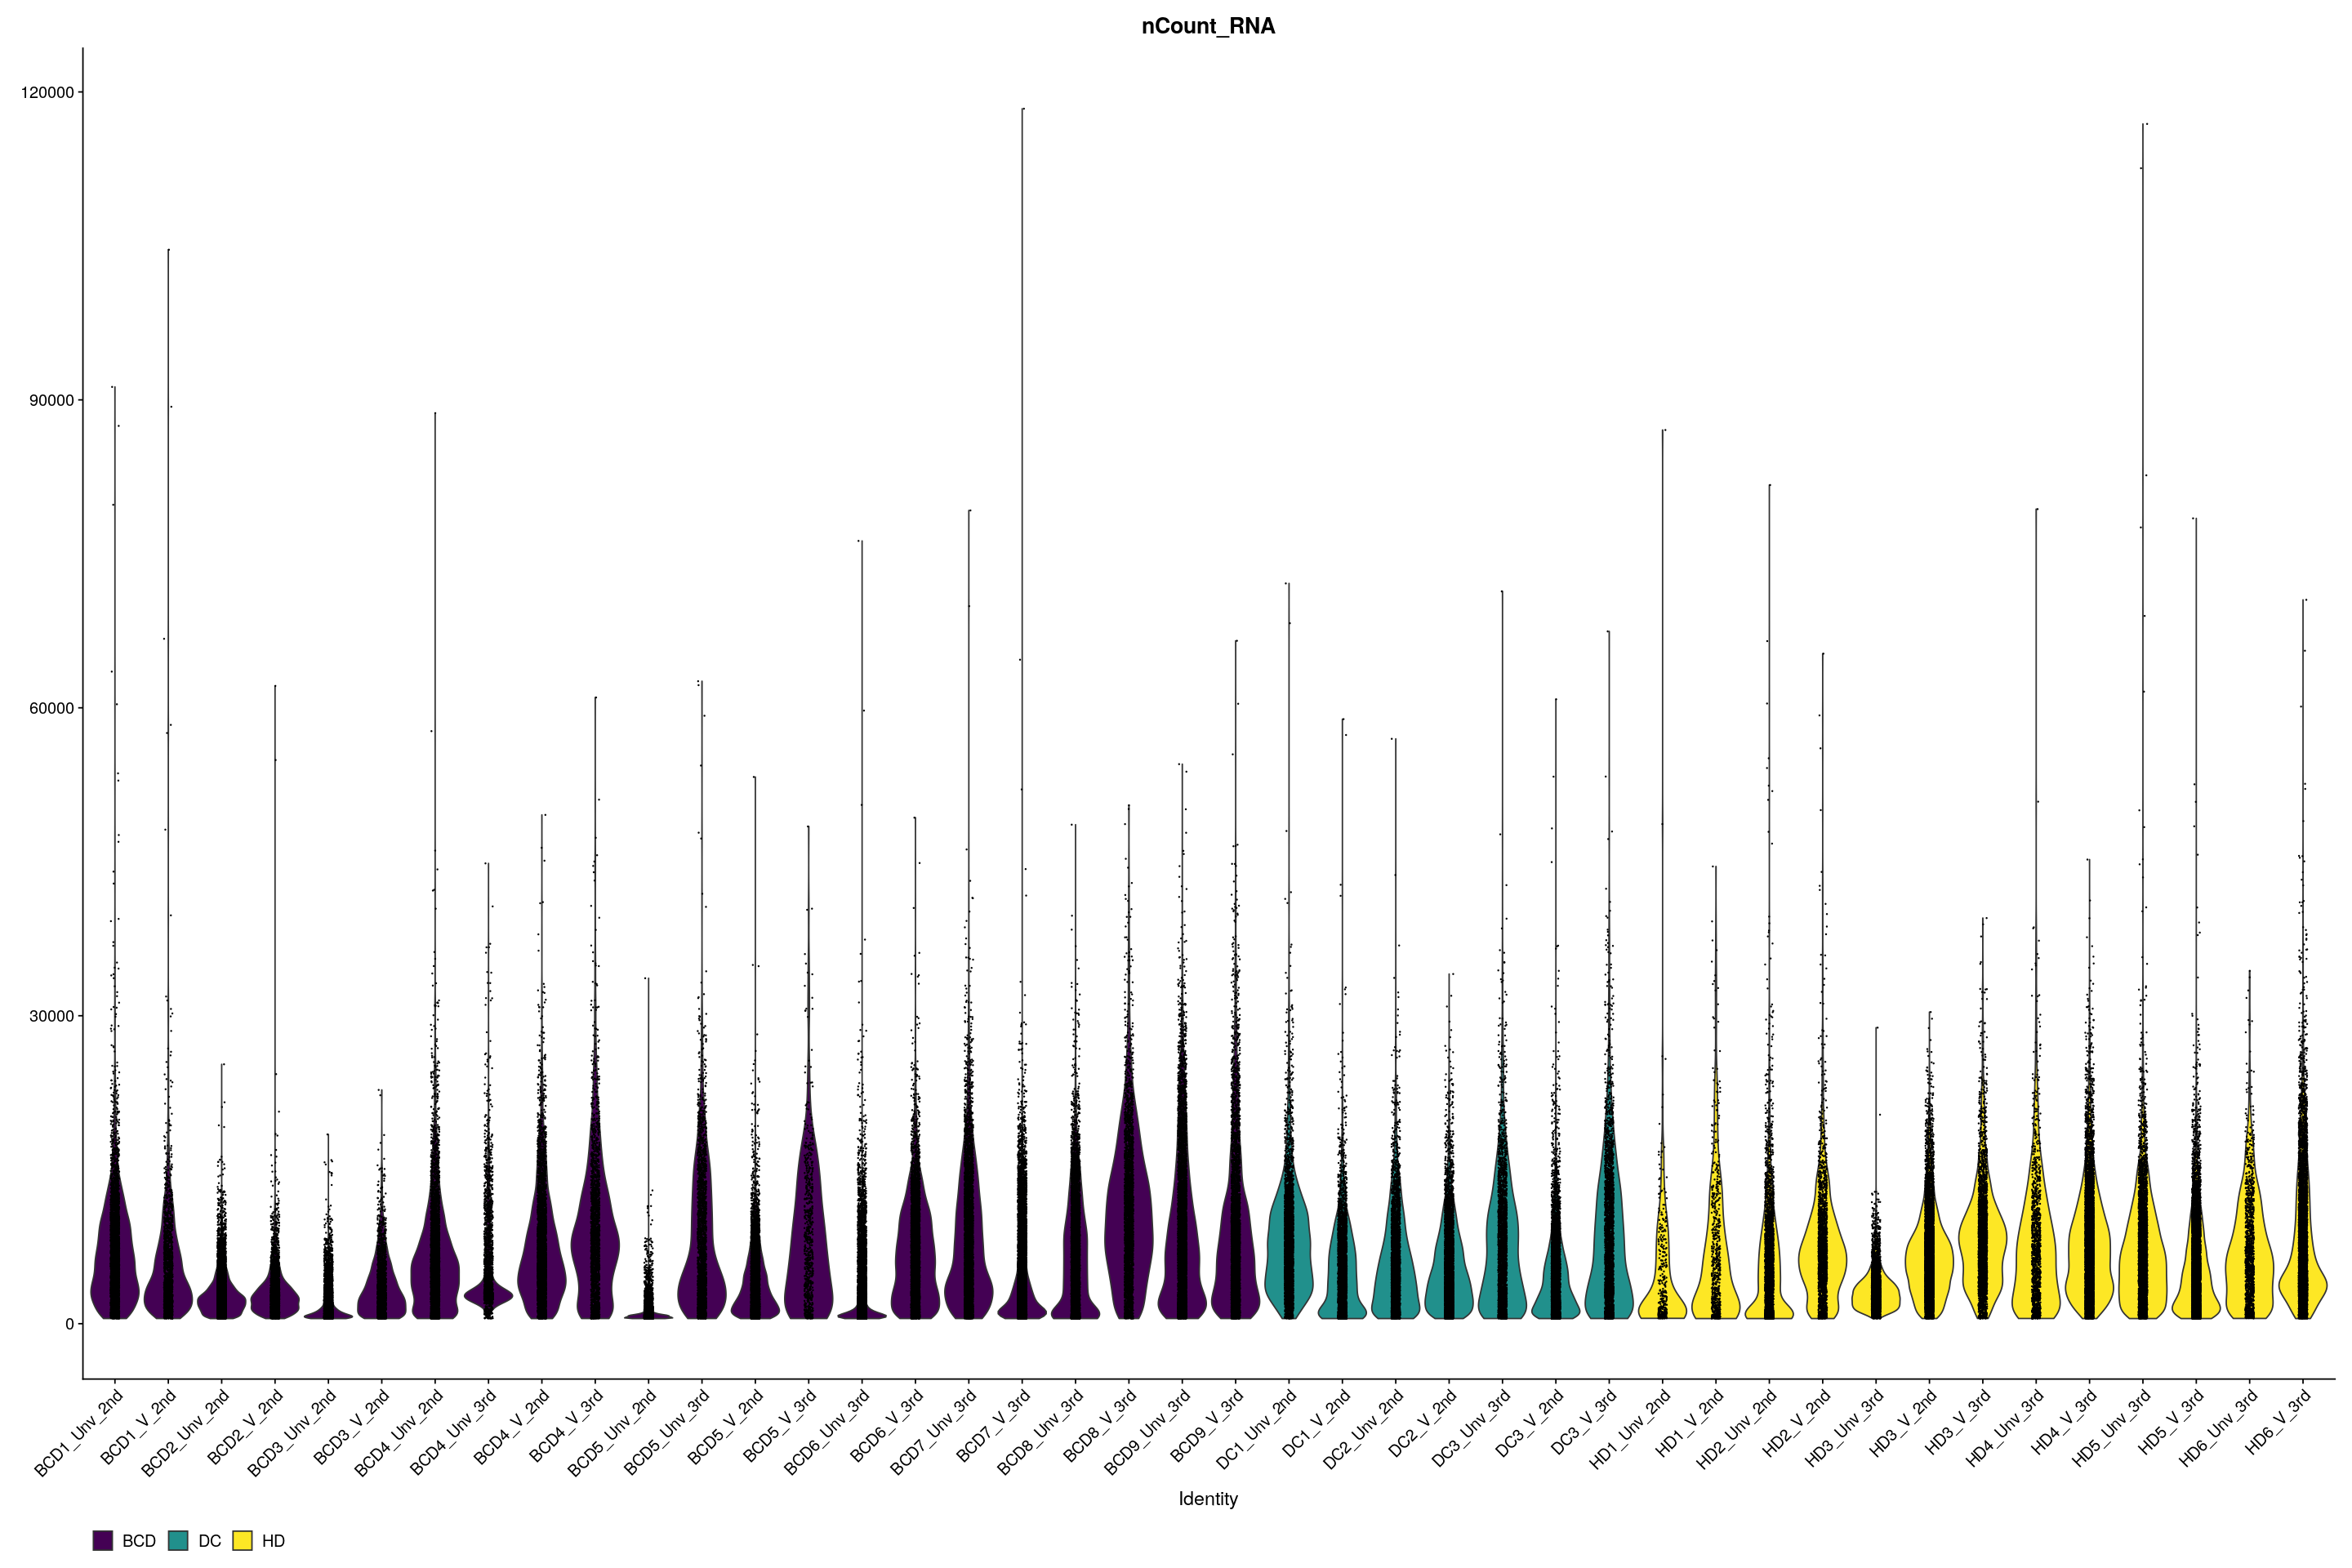

In [9]:
VlnPlot(object = combined, features = "nCount_RNA" , split.by = "disease") + ggplot2::theme(legend.position = 'bottom') + ggplot2::scale_fill_manual(values = disease_colors)

Most often should be around a mean of ~1000. 

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



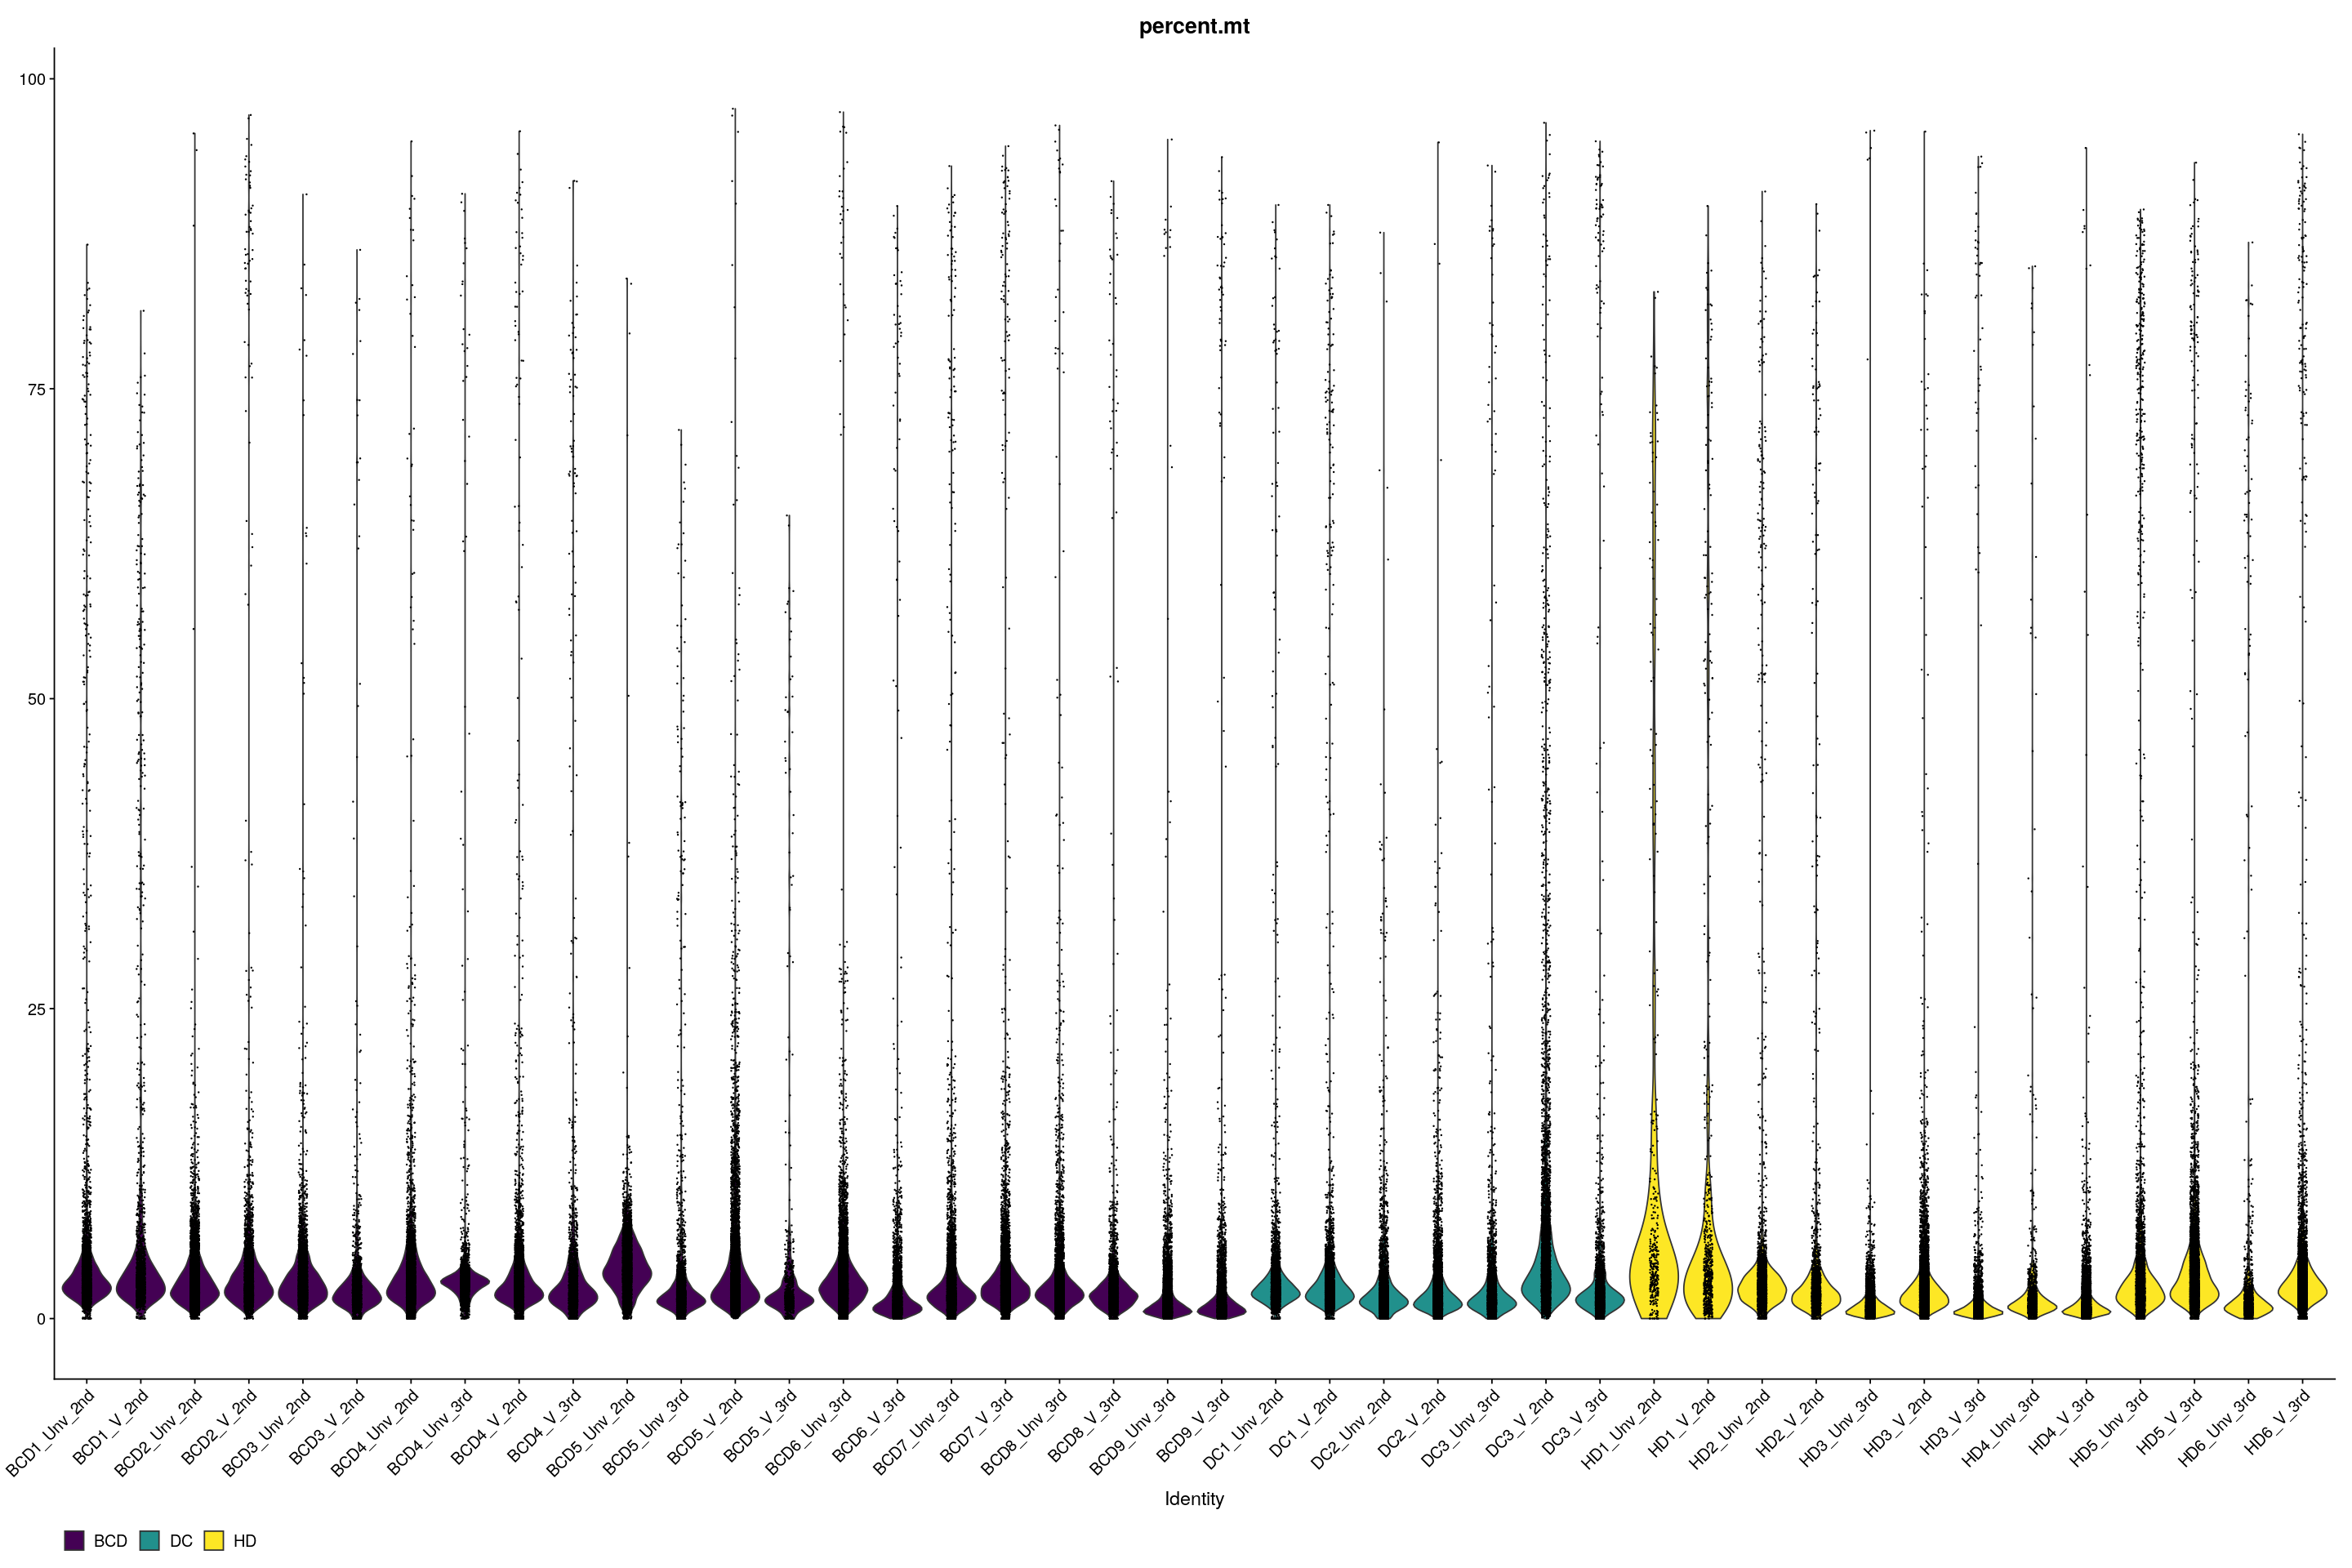

In [10]:
VlnPlot(object = combined, features =  "percent.mt",split.by = "disease") + ggplot2::theme(legend.position = 'bottom') + ggplot2::scale_fill_manual(values = disease_colors)

Good cutoff probably around 10%

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



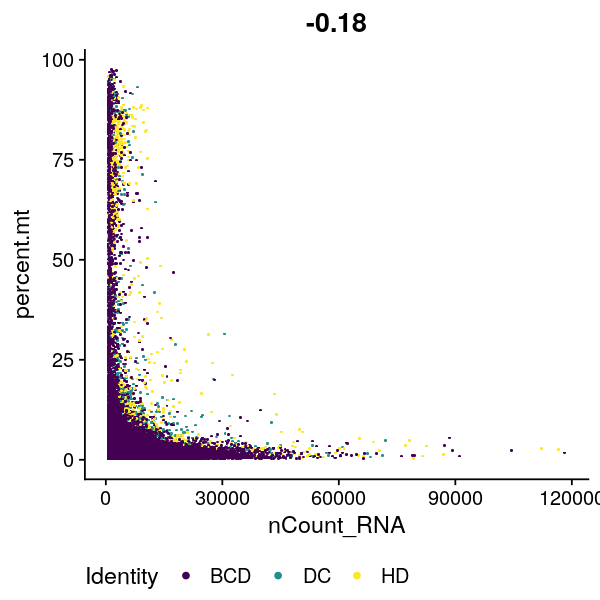

In [11]:
# Low-quality / dying cells often exhibit extensive mitochondrial contamination
options(repr.plot.width=5, repr.plot.height=5)
FeatureScatter(object = combined, feature1 = "nCount_RNA", feature2 = "percent.mt",group.by = "disease", cols = disease_colors)+ ggplot2::theme(legend.position = 'bottom')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



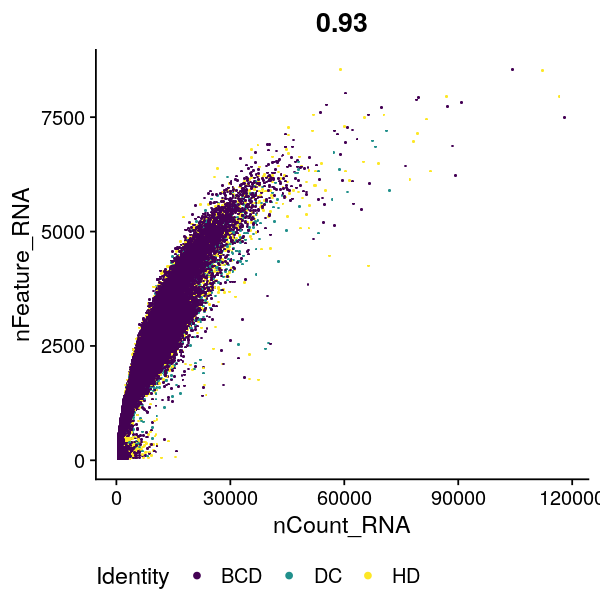

In [14]:
# Low-quality cells or empty droplets will often have very few genes. Cell doublets or multiplets may exhibit an aberrantly high gene count

FeatureScatter(object = combined, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",group.by = "disease", cols = disease_colors) + ggplot2::theme(legend.position = 'bottom')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



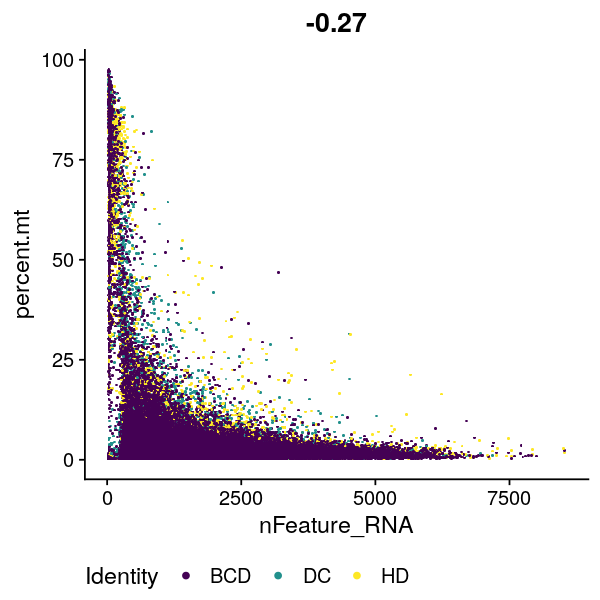

In [15]:
FeatureScatter(object = combined, feature1 = "nFeature_RNA", feature2 = "percent.mt",group.by = "disease", cols = disease_colors) + ggplot2::theme(legend.position = 'bottom')

# Seurat analysis

*Warning: Don't rerun, code was run on HPC, otherwise notebook crashes. Results are loaded below and plotted*


## Plotting results



In [1]:
combined <- readRDS("~/Documents/merged_analysis_combined_final.rds")

ERROR: Error: cannot allocate vector of size 52.2 Gb
